#📌 Extracción

In [61]:
import pandas as pd
import json
import requests

In [62]:
##url='https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json'

In [63]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [64]:
df = pd.json_normalize(data)
pd.set_option('display.max_columns', None)
df.head()


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity internet.OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   
2              Fiber optic                      No                    No   
3              Fiber optic                      No                   Yes   
4              Fiber optic                      No                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod  account.Charges.Monthly account.Charges.Total  
0          Mailed check                     65.6                 593.3  
1          Mailed check                     59.9                 542.4  
2      Electronic check                     73.9                280.85  
3      Electronic check                     98.0               1237.85  
4          Mailed check                     83.9                 267.4

In [65]:
pd.reset_option('display.max_columns')

Diccionario de datos
+ **customerID**: número de identificación único de cada cliente
+ **Churn**: si el cliente dejó o no la empresa
+ **gender**: género (masculino y femenino)
+ **SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o + mayor a 65 años
+ **Partner**: si el cliente tiene o no una pareja
+ **Dependents**: si el cliente tiene o no dependientes
+ **tenure**: meses de contrato del cliente
+ **PhoneService**: suscripción al servicio telefónico
+ **MultipleLines**: suscripción a más de una línea telefónica
+ **InternetService**: suscripción a un proveedor de internet
+ **OnlineSecurity**: suscripción adicional de seguridad en línea
+ **OnlineBackup**: suscripción adicional de respaldo en línea
+ **DeviceProtection**: suscripción adicional de protección del dispositivo
+ **TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera
+ **StreamingTV**: suscripción de televisión por cable
+ **StreamingMovies**: suscripción de streaming de películas
+ **Contract**: tipo de contrato
+ **PaperlessBilling**: si el cliente prefiere recibir la factura en línea
+ **PaymentMethod**: forma de pago
+ **Charges.Monthly**: total de todos los servicios del cliente por mes
+ **Charges.Total**: total gastado por el cliente

# mentoria

In [66]:
for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 73'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber o

In [67]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


In [68]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [69]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

#🔧 Transformación

In [70]:
mask = pd.to_numeric(df["account.Charges.Total"], errors="coerce").isna() # Detectar valores no numéricos
df[mask]
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")
#df["account.Charges.Total"] = df["account.Charges.Total"].astype("float64")

In [71]:
df["account.Charges.Total"] = df["account.Charges.Total"].astype("float64")

In [72]:
df.info()
df.dtypes
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       account.Charges.Total  
count            7256.000000  
mean             2280.634213  
std              2268.632997  
min                18.800000  
25%               400.225000  
50%              1391.000000  
75%              3785.300000  
max              8684.800000

In [73]:
#df_gente_out.columns

In [74]:
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service','No')
df['internet.OnlineSecurity'] = df['internet.OnlineSecurity'].replace('No internet service','No')
df['internet.OnlineBackup'] = df['internet.OnlineBackup'].replace('No internet service','No')
df['internet.DeviceProtection'] = df['internet.DeviceProtection'].replace('No internet service','No')
df['internet.TechSupport'] = df['internet.TechSupport'].replace('No internet service','No')
df['internet.StreamingTV'] = df['internet.StreamingTV'].replace('No internet service','No')
df['internet.StreamingMovies'] = df['internet.StreamingMovies'].replace('No internet service','No')
df = df.drop(df[df["Churn"] == ""].index)
for i in df.columns:
  print(df[i].value_counts())
  print(df[i].unique())
  print('############################')

customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
############################
Churn
No     5174
Yes    1869
Name: count, dtype: int64
['No' 'Yes']
############################
customer.gender
Male      3555
Female    3488
Name: count, dtype: int64
['Female' 'Male']
############################
customer.SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
[0 1]
############################
customer.Partner
No     3641
Yes    3402
Name: count, dtype: int64
['Yes' 'No']
############################
customer.Dependents
No     4933
Yes    2110
Name: count, dtype: int64
['Yes' 'No']
############################
customer.tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0

In [75]:
df["customerID"].duplicated().any()

np.False_

In [76]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly']/31
df

customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ...  \
0                     No                      DSL  ...   
1                    Yes                      DSL  ...   
2                     No              Fiber optic  ...   
3                     No              Fiber optic  ...   
4                     No              Fiber optic  ...   
...                  ...                      ...  ...   
7262                  No                      DSL  ...   
7263                 Yes              Fiber optic  ...   
7264                  No                      DSL  ...   
7265                  No                      DSL  ...   
7266                  No                      DSL  ...   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                      Yes   
4                          No   Month-to-month                      Yes   
...                       ...              ...                      ...   
7262                       No         One year                       No   
7263                      Yes 

In [77]:
df

customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ...  \
0                     No                      DSL  ...   
1                    Yes                      DSL  ...   
2                     No              Fiber optic  ...   
3                     No              Fiber optic  ...   
4                     No              Fiber optic  ...   
...                  ...                      ...  ...   
7262                  No                      DSL  ...   
7263                 Yes              Fiber optic  ...   
7264                  No                      DSL  ...   
7265                  No                      DSL  ...   
7266                  No                      DSL  ...   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                      Yes   
4                          No   Month-to-month                      Yes   
...                       ...              ...                      ...   
7262                       No         One year                       No   
7263                      Yes 

In [78]:
#df.replace('No',0, inplace=True)
#df.replace('Yes',1, inplace=True)
df['customer.SeniorCitizen'].replace(0,'No', inplace=True)
df['customer.SeniorCitizen'].replace(1,'Yes', inplace=True)
df['Churn'].replace('No','Permanece', inplace=True)
df['Churn'].replace('Yes','DeBaja', inplace=True)

/tmp/ipython-input-1669907473.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1669907473.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [79]:
for i in df:
  print(df[i].value_counts())
  print(df[i].unique())
  print(df[i].nunique())
  print('############################')
df.info()

customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
7043
############################
Churn
Permanece    5174
DeBaja       1869
Name: count, dtype: int64
['Permanece' 'DeBaja']
2
############################
customer.gender
Male      3555
Female    3488
Name: count, dtype: int64
['Female' 'Male']
2
############################
customer.SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64
['No' 'Yes']
2
############################
customer.Partner
No     3641
Yes    3402
Name: count, dtype: int64
['Yes' 'No']
2
############################
customer.Dependents
No     4933
Yes    2110
Name: count, dtype: int64
['Yes' 'No']
2
############################
customer.tenure
1     613
72    362
2     238
3     200
4     176
   

In [80]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [81]:
antiguo = ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

nuevo = ['ID', 'Churn', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
dicc = dict(zip(antiguo, nuevo))
df = df.rename(columns=dicc)
df

ID      Churn  gender SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO  Permanece  Female            No     Yes        Yes       9   
1     0003-MKNFE  Permanece    Male            No      No         No       9   
2     0004-TLHLJ     DeBaja    Male            No      No         No       4   
3     0011-IGKFF     DeBaja    Male           Yes     Yes         No      13   
4     0013-EXCHZ     DeBaja  Female           Yes     Yes         No       3   
...          ...        ...     ...           ...     ...        ...     ...   
7262  9987-LUTYD  Permanece  Female            No      No         No      13   
7263  9992-RRAMN     DeBaja    Male            No     Yes         No      22   
7264  9992-UJOEL  Permanece    Male            No      No         No       2   
7265  9993-LHIEB  Permanece    Male            No     Yes        Yes      67   
7266  9995-HOTOH  Permanece    Male            No     Yes        Yes      63   

     PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             Yes            No             DSL  ...               No   
1             Yes           Yes             DSL  ...               No   
2             Yes            No     Fiber optic  ...              Yes   
3             Yes            No     Fiber optic  ...              Yes   
4             Yes            No     Fiber optic  ...               No   
...           ...           ...             ...  ...              ...   
7262          Yes            No             DSL  ...               No   
7263          Yes           Yes     Fiber optic  ...               No   
7264          Yes            No             DSL  ...               No   
7265          Yes            No             DSL  ...              Yes   
7266           No            No             DSL  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes         Yes              No        One year              Yes   
1             No          No             Yes  Month-to-month               No   
2             No          No              No  Month-to-month              Yes   
3             No         Yes             Yes  Month-to-month              Yes   
4            Yes         Yes              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7262         Yes          No              No        One year               No   
7263          No          No             Yes  Month-to-month              Yes   
7264          No          No              No  Month-to-month              Yes   
7265         Yes          No             Yes        Two year               No   
7266          No         Yes             Yes        Two year               No   

         PaymentMethod Charges.Monthly Charges.Total  Cuentas_Diarias  
0         Mailed check           65.60        593.30         2.116129  
1         Mailed check           59.90        542.40         1.932258  
2     Electronic check           73.90        280.85         2.383871  
3     Electronic check           98.00       1237.85         3.161290  
4         Mailed check           83.90        267.40         2.706452  
...                ...             ...           ...              ...  
7262      Mailed check           55.15        742.90         1.779032  
7263  Electronic check           85.10       1873.70         2.745161  
7264      Mailed check           50.30         92.75         1.622581  
7265      Mailed check           67.85       4627.65         2.188710  
7266  Electronic check           59.00       3707.60         1.903226  

[7043 rows x 22 columns]

#📊 Carga y análisis

In [82]:
df.describe()

tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7043.000000      7043.000000    7032.000000      7043.000000
mean     32.371149        64.761692    2283.300441         2.089087
std      24.559481        30.090047    2266.771362         0.970647
min       0.000000        18.250000      18.800000         0.588710
25%       9.000000        35.500000     401.450000         1.145161
50%      29.000000        70.350000    1397.475000         2.269355
75%      55.000000        89.850000    3794.737500         2.898387
max      72.000000       118.750000    8684.800000         3.830645

In [83]:
df

ID      Churn  gender SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO  Permanece  Female            No     Yes        Yes       9   
1     0003-MKNFE  Permanece    Male            No      No         No       9   
2     0004-TLHLJ     DeBaja    Male            No      No         No       4   
3     0011-IGKFF     DeBaja    Male           Yes     Yes         No      13   
4     0013-EXCHZ     DeBaja  Female           Yes     Yes         No       3   
...          ...        ...     ...           ...     ...        ...     ...   
7262  9987-LUTYD  Permanece  Female            No      No         No      13   
7263  9992-RRAMN     DeBaja    Male            No     Yes         No      22   
7264  9992-UJOEL  Permanece    Male            No      No         No       2   
7265  9993-LHIEB  Permanece    Male            No     Yes        Yes      67   
7266  9995-HOTOH  Permanece    Male            No     Yes        Yes      63   

     PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             Yes            No             DSL  ...               No   
1             Yes           Yes             DSL  ...               No   
2             Yes            No     Fiber optic  ...              Yes   
3             Yes            No     Fiber optic  ...              Yes   
4             Yes            No     Fiber optic  ...               No   
...           ...           ...             ...  ...              ...   
7262          Yes            No             DSL  ...               No   
7263          Yes           Yes     Fiber optic  ...               No   
7264          Yes            No             DSL  ...               No   
7265          Yes            No             DSL  ...              Yes   
7266           No            No             DSL  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes         Yes              No        One year              Yes   
1             No          No             Yes  Month-to-month               No   
2             No          No              No  Month-to-month              Yes   
3             No         Yes             Yes  Month-to-month              Yes   
4            Yes         Yes              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7262         Yes          No              No        One year               No   
7263          No          No             Yes  Month-to-month              Yes   
7264          No          No              No  Month-to-month              Yes   
7265         Yes          No             Yes        Two year               No   
7266          No         Yes             Yes        Two year               No   

         PaymentMethod Charges.Monthly Charges.Total  Cuentas_Diarias  
0         Mailed check           65.60        593.30         2.116129  
1         Mailed check           59.90        542.40         1.932258  
2     Electronic check           73.90        280.85         2.383871  
3     Electronic check           98.00       1237.85         3.161290  
4         Mailed check           83.90        267.40         2.706452  
...                ...             ...           ...              ...  
7262      Mailed check           55.15        742.90         1.779032  
7263  Electronic check           85.10       1873.70         2.745161  
7264      Mailed check           50.30         92.75         1.622581  
7265      Mailed check           67.85       4627.65         2.188710  
7266  Electronic check           59.00       3707.60         1.903226  

[7043 rows x 22 columns]

In [84]:
import plotly.express as px

In [85]:
px.histogram(df, x = 'gender', text_auto = True, color = 'Churn', barmode = 'group')

In [86]:
import plotly.express as px

for col in df.columns:
    fig = px.histogram(
        df,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True
    )
    fig.show()


In [87]:
import plotly.express as px

for col in df.columns:
    fig = px.histogram(
        df,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True,
        histnorm='percent'
    )
    fig.update_traces(
        texttemplate='%{y:.2f}%',
        textposition='outside'
    )

    fig.show()

#📄Informe final

## Introduccion

Tenemos una empresa que tiene una alta tasa de cancelaciones y nos solicita comprender los factores que llevaron los clientes a cancelar los servicios prestados por em empresa.

## Limpieza y Tratamientos de datos

Los pasa que se hicieron para poder importar, limpiar y procesar los datos son los siguientes:
+ Guardamos el url donde se encuentran los datos.
+ Se exporta como formato JSON anidados para tener los datos en un dataframe, la funcion que se uso fue "pd.json_normalize(data)".
+ Se estudia y comprende de que se trata en DataFrame, para poder comprender mejor los datos que tenemos.
+ Completamos los valores numeros que no se ecuentran en dataframe con NaN, para poder transformar las columnas en tipo numerica.
+ Buscamos filas duplicadas.
+ Igualamos criterios de Yes y NO, ademas de revisar que existan solo estos unicos valores, y no otros con mayusculas o minusculas.
+ cambiamos los nombres a las culumna, por otras mas faciles de identificar.

##Analisis Exploratorio de Datos

Ya teniendo listo los datos para poder procesarlos y graficarlos, se procede a hacer graficos con todas las columnas agrupadas por las personas que cancelaron o se quedaron.

Para luego reconocer cuales son las columnas que nos estan dando mejor informacion sobre las personas que cancelaron el plan.

Para ello se tomaron aquellos atributos que tuvieran una diferencia porcentual de 75% aproximadamente, o aquellas que se vea claramente alguna tendencia.

##Conclusiones

In [98]:
import plotly.express as px

# se selcciona las columnas que tiene mayor a similar a 75% de diferencia.
colunma = [   'SeniorCitizen',
       'Dependents', 'tenure',
       'PhoneService', 'InternetService',
       'Contract',
       'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for col in colunma:
    fig = px.histogram(
        df,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True,
        histnorm='percent'
    )
    fig.update_traces(
        texttemplate='%{y:.2f}%',
        textposition='outside'
    )

    fig.show()

las columnas que tiene mayor incidencia son las siguientes:

+ **SeniorCitizen** = 75% de las personas que no son mayores de edad dan de baja el servicio.
+ **Dependents** = 85% de las personas que no tiene dependientes dan de baja el servico.
+ **tenure** = las personas que tiene planes entre 1 y 16 meses son mas propensos a dejar el servicio.
+ **PhoneService** = 91% de la personas que tiene servicios telefonicos dan de baja el servicio.
+ **InternetService** = 70% de las personas que tiene fibra optica dan de baja el servicio.
+ **Contract** = 89% de la spersonas que tiene contrato mes a mes dan de baja el servicio.
+ **PaperlessBilling** = 75% de las personas que prefiere recibir las cuentas en linea, dan de baja el servicio.
+ **PaymentMethod** = 57% de las personas que pagan con cheque electronico dan de baja el servicio.
+ **Charges.Monthly** = las personas que tiene un gasto de mes entre [68-106] tienden a dar de baj el servicio.
+ **Charges.Total** = las personas que tiene menos gastos totales tienden a dar de baj el servicio.
+ **Cuentas_Diarias** = las personas qur tiene un gasto mensual de [2-4] tienden a dar de baja el servicio.





##Recomendaciones

Para nuestras recomendaciones nos centraremos en las siguientes variables:

+ contract
+ tenure
+ Dependents

In [95]:
colunma = ['Contract']
for col in colunma:
    fig = px.histogram(
        df,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True,
        histnorm='percent'
    )
    fig.update_traces(
        texttemplate='%{y:.2f}%',
        textposition='outside'
    )

    fig.show()

***1.- Nuestra primera recomendacion es que los contratos mes a mes puedan en un futuro, cambiarse a plane de un año, teniendo mejore beneficios o promociones.***

In [94]:
colunma = ['tenure']
for col in colunma:
    fig = px.histogram(
        df,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True,
        histnorm='percent'
    )
    fig.update_traces(
        texttemplate='%{y:.2f}%',
        textposition='outside'
    )

    fig.show()

***2.- Nuestra Segunda recomendacion es tratar de mantener al cliente por 17 meses como minimo para bajar la probabilidad que las personas den de baja el servicio medienate promociones validas por 17 meses algun enganche con celulares x 17 meses.***

In [93]:
colunma = ['Dependents']
for col in colunma:
    fig = px.histogram(
        df,
        x=col,
        color='Churn',
        barmode='group',
        text_auto=True,
        histnorm='percent'
    )
    fig.update_traces(
        texttemplate='%{y:.2f}%',
        textposition='outside'
    )

    fig.show()

***3.- Nuestra tercera y ultima recomendacion es tratar de hacer convenios con las familias de los titulares para que puedan tener a personas que depende del plan principal.***

#Extra

In [116]:
df1 = df.copy()
binary_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'SeniorCitizen',
    'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]
df1[binary_cols] = df1[binary_cols].replace({'Yes': 1, 'No': 0, 'Permanece': 1, 'DeBaja': 0 })

df1[binary_cols].corr()

/tmp/ipython-input-249998373.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Churn   Partner  Dependents  PhoneService  SeniorCitizen  \
Churn             1.000000  0.150448    0.164221     -0.011942      -0.150889   
Partner           0.150448  1.000000    0.452676      0.017706       0.016479   
Dependents        0.164221  0.452676    1.000000     -0.001762      -0.211185   
PhoneService     -0.011942  0.017706   -0.001762      1.000000       0.008576   
SeniorCitizen    -0.150889  0.016479   -0.211185      0.008576       1.000000   
PaperlessBilling -0.191825 -0.014877   -0.111377      0.016505       0.156530   
OnlineSecurity    0.171226  0.143106    0.080972     -0.092893      -0.038653   
OnlineBackup      0.082255  0.141498    0.023671     -0.052312       0.066572   
DeviceProtection  0.066160  0.153786    0.013963     -0.071227       0.059428   
TechSupport       0.164674  0.119999    0.063268     -0.096340      -0.060625   
StreamingTV      -0.063228  0.124666   -0.016558     -0.022574       0.105378   
StreamingMovies  -0.061382  0.117412   -0.039741     -0.032959       0.120176   

                  PaperlessBilling  OnlineSecurity  OnlineBackup  \
Churn                    -0.191825        0.171226      0.082255   
Partner                  -0.014877        0.143106      0.141498   
Dependents               -0.111377        0.080972      0.023671   
PhoneService              0.016505       -0.092893     -0.052312   
SeniorCitizen             0.156530       -0.038653      0.066572   
PaperlessBilling          1.000000       -0.003636      0.126735   
OnlineSecurity           -0.003636        1.000000      0.283832   
OnlineBackup              0.126735        0.283832      1.000000   
DeviceProtection          0.103797        0.275438      0.303546   
TechSupport               0.037880        0.354931      0.294233   
StreamingTV               0.223841        0.176207      0.282106   
StreamingMovies           0.211716        0.187398      0.274501   

                  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
Churn                     0.066160     0.164674    -0.063228        -0.061382  
Partner                   0.153786     0.119999     0.124666         0.117412  
Dependents                0.013963     0.063268    -0.016558        -0.039741  
PhoneService             -0.071227    -0.096340    -0.022574        -0.032959  
SeniorCitizen             0.059428    -0.060625     0.105378         0.120176  
PaperlessBilling          0.103797     0.037880     0.223841         0.211716  
OnlineSecurity            0.275438     0.354931     0.176207         0.187398  
OnlineBackup              0.303546     0.294233     0.282106         0.274501  
DeviceProtection          1.000000     0.333313     0.390874         0.402111  
TechSupport               0.333313     1.000000     0.278070         0.279358  
StreamingTV               0.390874     0.278070     1.000000         0.533094  
StreamingMovies           0.402111     0.279358     0.533094         1.000000

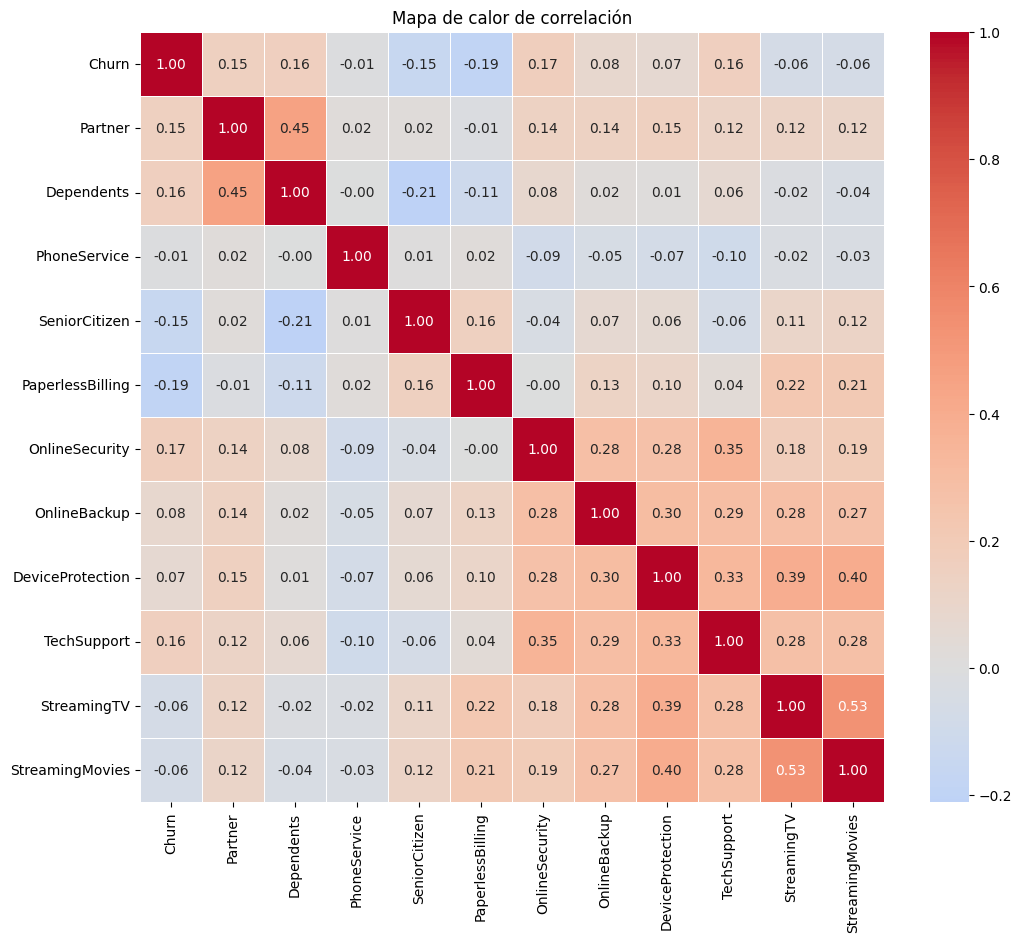

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr = df1[binary_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,          # muestra los valores
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # colores
    center=0,            # centro en 0
    linewidths=0.5
)

plt.title("Mapa de calor de correlación")
plt.show()